# Data Exploration

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

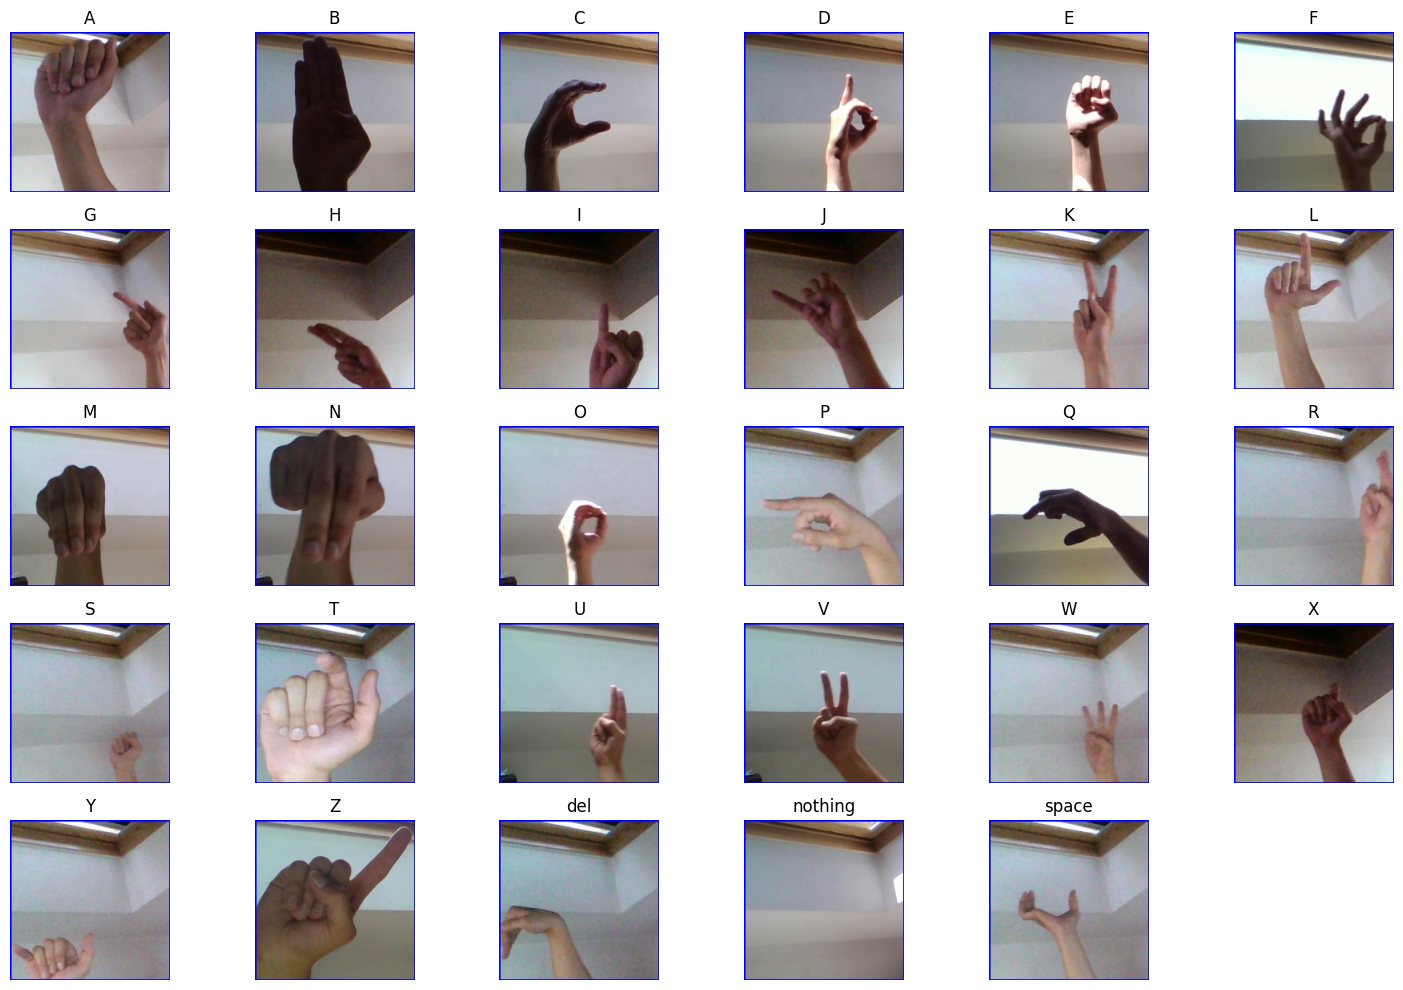

In [8]:
base_path = 'Data/archive/asl_alphabet_train/asl_alphabet_train/'
classes = sorted(os.listdir(base_path))

plt.figure(figsize=(15,10))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_path, cls)
    image_files = os.listdir(class_path)

    if not image_files:
        continue # skip if no image

    image_path = os.path.join(class_path, image_files[0]) # first iage
    image = mpimg.imread(image_path)

    plt.subplot(5, 6, i + 1)
    plt.imshow(image)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Model

In [9]:
import os
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [11]:
# Transform & DataLoader
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

data_dir = 'Data/archive/asl_alphabet_train/asl_alphabet_train'
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

num_classes = len(train_dataset.classes)

In [20]:
# Simple CNN Model
class ASLClassifierSimple(nn.Module):
    def __init__(self, num_classes):
        super(ASLClassifierSimple, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(64 * 15 * 15, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [22]:
# Train Loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ASLClassifierSimple(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 1353.1722
Epoch 2, Loss: 169.3061
Epoch 3, Loss: 107.8857
Epoch 4, Loss: 76.3655
Epoch 5, Loss: 66.7816
Epoch 6, Loss: 55.3955
Epoch 7, Loss: 50.7062
Epoch 8, Loss: 37.7822
Epoch 9, Loss: 47.8867
Epoch 10, Loss: 40.0664
Epoch 11, Loss: 27.7274
Epoch 12, Loss: 28.1503
Epoch 13, Loss: 33.1155
Epoch 14, Loss: 30.9303
Epoch 15, Loss: 32.3697
Epoch 16, Loss: 28.7777
Epoch 17, Loss: 32.9954
Epoch 18, Loss: 21.8773
Epoch 19, Loss: 29.4510
Epoch 20, Loss: 22.5666
Epoch 21, Loss: 29.4413
Epoch 22, Loss: 27.7017
Epoch 23, Loss: 24.9519
Epoch 24, Loss: 25.4958
Epoch 25, Loss: 24.4879
Epoch 26, Loss: 26.8103
Epoch 27, Loss: 22.4517
Epoch 28, Loss: 23.0896
Epoch 29, Loss: 32.6480
Epoch 30, Loss: 25.9074
Epoch 31, Loss: 16.7545
Epoch 32, Loss: 35.6841
Epoch 33, Loss: 24.0455
Epoch 34, Loss: 32.0435
Epoch 35, Loss: 25.9871
Epoch 36, Loss: 24.0321
Epoch 37, Loss: 21.3864
Epoch 38, Loss: 23.7606
Epoch 39, Loss: 16.8255
Epoch 40, Loss: 37.0543
Epoch 41, Loss: 26.3700
Epoch 42, Loss: 29.71

In [23]:
# Test dataset
test_dir = 'Data/archive/asl_alphabet_test/asl_alphabet_test'
test_dataset = datasets.ImageFolder(
    root = test_dir,
    transform=transform
)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate(model, test_loader)

Test Accuracy: 100.00%
